In [19]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from matplotlib.offsetbox import AnchoredText
import matplotlib.patches as mpatches

In [2]:
DATA_PATH = Path("../datasets/all_audios.jsonl")

In [3]:
df = pd.read_json(DATA_PATH, lines=True)

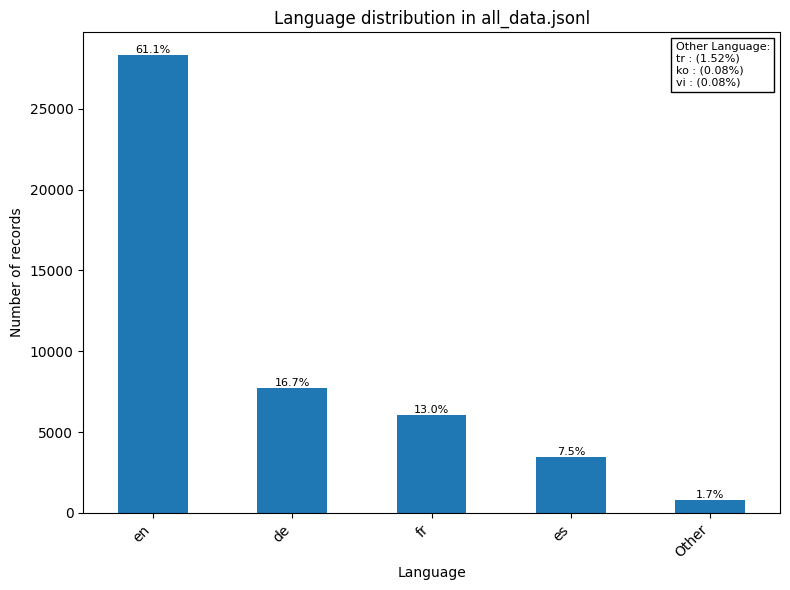

In [15]:
lang_counts_raw = df["language"].value_counts()

threshold_ratio = 0.05
threshold = threshold_ratio * lang_counts_raw.sum()
rare_mask = lang_counts_raw < threshold
other_detail = lang_counts_raw[rare_mask]

lang_counts = lang_counts_raw[~rare_mask].copy()
if not other_detail.empty:
    lang_counts.loc["Other"] = other_detail.sum()

lang_counts = lang_counts.sort_values(ascending=False)
lang_percent = lang_counts / lang_counts.sum() * 100

plt.figure(figsize=(max(8, 0.5 * len(lang_counts)), 6))
ax = lang_counts.plot(kind="bar")

for i, (count, pct) in enumerate(zip(lang_counts, lang_percent)):
    ax.text(i, count, f"{pct:.1f}%", ha="center", va="bottom",
            fontsize=8, rotation=0)

if "Other" in lang_counts.index and not other_detail.empty:
    # Calculate percentages for other languages
    other_percent = other_detail / lang_counts_raw.sum() * 100
    detail_str = "Other Language:\n" + "\n".join(
        f"{lang} : ({pct:.2f}%)" for lang, cnt, pct in zip(other_detail.index, other_detail, other_percent)
    )
    anchored = AnchoredText(detail_str,
                           loc="upper right",
                           prop={'size': 8},
                           frameon=True)
    ax.add_artist(anchored)

plt.xlabel("Language")
plt.ylabel("Number of records")
plt.title("Language distribution in all_data.jsonl")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
#plt.savefig(out_png, dpi=150)

In [21]:
def autopct_big(pcts):
    def inner(pct):
        return f"{pct:.1f}%" if pct >= 0.05 else ""
    return inner

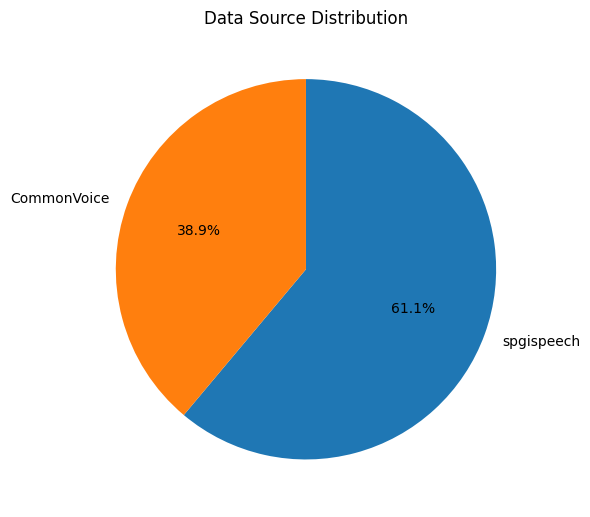

In [24]:
src_counts_raw = df["source_ds"].value_counts()


total = src_counts_raw.sum()
rare_mask = src_counts_raw < 0.05 * total
other_detail = src_counts_raw[rare_mask]
src_counts = src_counts_raw[~rare_mask].copy()
if not other_detail.empty:
    src_counts.loc["Other"] = other_detail.sum()


pct_series = src_counts / src_counts.sum() * 100


plt.figure(figsize=(6, 6))
wedges, *_ = plt.pie(
    src_counts,
    labels=src_counts.index,
    startangle=90,
    counterclock=False,
    autopct=autopct_big(pct_series)
)
plt.title("Data Source Distribution")


legend_handles = []
legend_labels  = []

if "Other" in src_counts.index and not other_detail.empty:
    for name, cnt in other_detail.items():
        pct = cnt / total * 100
        legend_handles.append(mpatches.Patch(facecolor='none', edgecolor='none'))
        legend_labels.append(f"{name}  ({pct:.1f}% · {cnt})")


    legend_handles.insert(0, mpatches.Patch(facecolor='none', edgecolor='none'))
    legend_labels.insert(0, "Others:")

    plt.legend(
        legend_handles,
        legend_labels,
        loc="center left",
        bbox_to_anchor=(1.05, 0.5),
        fontsize=8,
        frameon=False
    )

plt.tight_layout()
#plt.savefig(out_png, dpi=150)